In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from datetime import datetime

# File Setup
#path_to_files = r'C:\Users\Kelly\Documents\DataScienceGradCert\DATA601\Project\AQ_Project_Data'

#CO
CO = pd.read_csv('CO_ALL.csv')
# NO2
NO2 = pd.read_csv('NO2_ALL.csv')
# ozone
ozone = pd.read_csv('ozone_ALL.csv')
# pm2_5
pm2_5 = pd.read_csv('pm2_5_ALL.csv')
# pm10
pm10 = pd.read_csv('pm10_ALL.csv')
# SO2
SO2 = pd.read_csv('SO2_ALL.csv')

In [2]:
# Define functions

# Calculates monthly values by averaging daily values from csv
def AverageDailyValues(csv, values, rename):
    
    # Change Daily data to Monthly.
    csv['Year'] = pd.DatetimeIndex(csv['Date']).year
    csv['Month'] = pd.DatetimeIndex(csv['Date']).month
    csv['DATE'] = pd.to_datetime(csv[['Year', 'Month']].assign(DAY=1))
    
    # Create pivot table with daily averages.
    monthly_df = pd.pivot_table(csv, #data
                                values = values, #the values we want to average
                                index = 'DATE', #rows
                                aggfunc = np.mean) #how we want data aggregated 
    # Rename column
    monthly_df = monthly_df.rename(columns={values:rename})
    
    return monthly_df

# Create OLS Model function
# Model Reference: https://datatofish.com/statsmodels-linear-regression/
def CreateOLSModel(df,Y_field, X_field):
    import statsmodels.api as sm
    
    # Create X and Y
    Y = df[Y_field]
    X = df[X_field]
    
    # Create constant
    X = sm.add_constant(X)
    
    # Create OLS Model
    model = sm.OLS(Y,X).fit()
    
    # Returns 3 outputs
    return model,X,Y

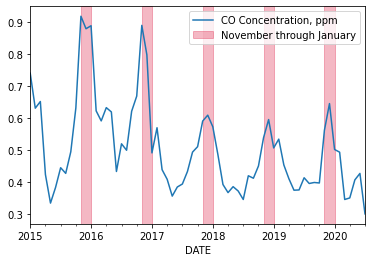

In [3]:
# Setup AQ data
# Determine average daily values, rename fields, plot and describe results. 
CO_values = 'Daily Max 8-hour CO Concentration'
CO_rename = 'Daily Max 8-hour CO Concentration ppm'
CO_monthly_df = AverageDailyValues(CO, CO_values, CO_rename)

#create figure and save
CO_data_fig, CO_data_ax = plt.subplots()

CO_monthly_df.plot(ax=CO_data_ax)

CO_data_ax.axvspan('11/1/2015','1/1/2016', color="crimson", alpha=.3)
CO_data_ax.axvspan('11/1/2016','1/1/2017', color="crimson", alpha=.3)
CO_data_ax.axvspan('11/1/2017','1/1/2018', color="crimson", alpha=.3)
CO_data_ax.axvspan('11/1/2018','1/1/2019', color="crimson", alpha=.3)
CO_data_ax.axvspan('11/1/2019','1/1/2020', color="crimson", alpha=.3)

CO_data_ax.legend(['CO Concentration, ppm', 'November through January'])

CO_monthly_df.describe()
CO_data_ax.figure.savefig('CO_data.png')

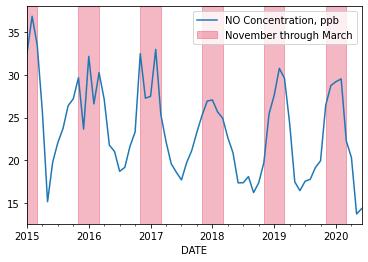

In [4]:
# Determine average daily values, rename fields, plot and describe results
NO2_values = 'Daily Max 1-hour NO2 Concentration'
NO2_rename = 'Daily Max 1-hour NO2 Concentration ppb'
NO2_monthly_df = AverageDailyValues(NO2, NO2_values, NO2_rename)

#create figure and save
NO2_data_fig, NO2_data_ax = plt.subplots()

NO2_monthly_df.plot(ax=NO2_data_ax)

NO2_data_ax.axvspan('1/1/2015','3/1/2015', color="crimson", alpha=.3)
NO2_data_ax.axvspan('11/1/2015','3/1/2016', color="crimson", alpha=.3)
NO2_data_ax.axvspan('11/1/2016','3/1/2017', color="crimson", alpha=.3)
NO2_data_ax.axvspan('11/1/2017','3/1/2018', color="crimson", alpha=.3)
NO2_data_ax.axvspan('11/1/2018','3/1/2019', color="crimson", alpha=.3)
NO2_data_ax.axvspan('11/1/2019','3/1/2020', color="crimson", alpha=.3)

NO2_data_ax.legend(['NO Concentration, ppb', 'November through March'])

NO2_monthly_df.describe()
NO2_data_ax.figure.savefig('NO2_data.png')

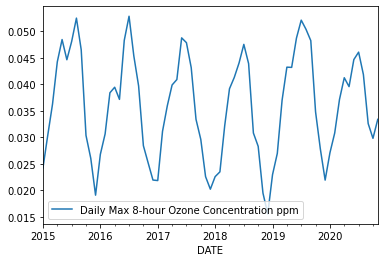

In [5]:
# Determine average daily values, rename fields, plot and describe results
ozone_values = 'Daily Max 8-hour Ozone Concentration'
ozone_rename = 'Daily Max 8-hour Ozone Concentration ppm'

ozone_monthly_df = AverageDailyValues(ozone, ozone_values, ozone_rename)
ozone_data_plt = ozone_monthly_df.plot()
ozone_data_plt
ozone_monthly_df.describe()
ozone_data_plt.figure.savefig('ozone_data.png')

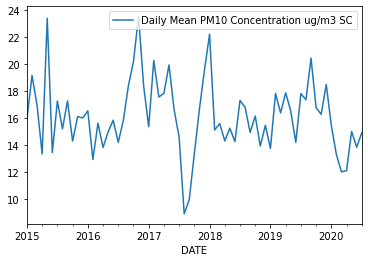

In [6]:
# Determine average daily values, rename fields, plot and describe results
pm10_values = 'Daily Mean PM10 Concentration'
pm10_rename = 'Daily Mean PM10 Concentration ug/m3 SC'

pm10_monthly_df = AverageDailyValues(pm10, pm10_values, pm10_rename)
pm10_data_plt = pm10_monthly_df.plot()
pm10_data_plt
pm10_monthly_df.describe()
pm10_data_plt.figure.savefig('pm10_data.png')

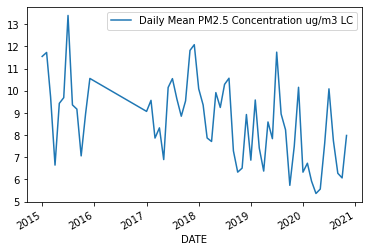

In [7]:
# Determine average daily values, rename fields, plot and describe results
pm2_5_values = 'Daily Mean PM2.5 Concentration'
pm2_5_rename = 'Daily Mean PM2.5 Concentration ug/m3 LC'

pm2_5_monthly_df = AverageDailyValues(pm2_5, pm2_5_values, pm2_5_rename)
pm2_5_data_plt = pm2_5_monthly_df.plot()
pm2_5_data_plt
pm2_5_monthly_df.describe()
pm2_5_data_plt.figure.savefig('pm2_5_data.png')

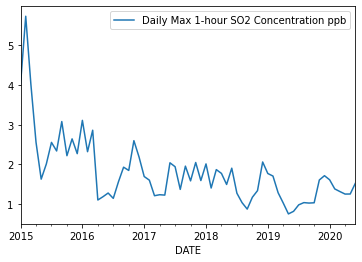

In [8]:
# Determine average daily values, rename fields, plot and describe results
SO2_values = 'Daily Max 1-hour SO2 Concentration'
SO2_rename = 'Daily Max 1-hour SO2 Concentration ppb'

SO2_monthly_df = AverageDailyValues(SO2, SO2_values, SO2_rename)
SO2_data_plt = SO2_monthly_df.plot()
SO2_data_plt
SO2_monthly_df.describe()
SO2_data_plt.figure.savefig('SO2_data.png')

In [9]:
# Setup Gasoline Data

# Read Gasline Data
gasoline_sales_df = pd.read_csv('District_of_Columbia_Total_Gasoline_All_Sales_per_Deliveries_by_Prime_Supplier.csv', skiprows=4)
gasoline_sales_df.head()

,Month,District of Columbia Total Gasoline All Sales/Deliveries by Prime Supplier Thousand Gallons per Day
0,Aug 2020,172.1
1,Jul 2020,166.3
2,Jun 2020,150.8
3,May 2020,117.9
4,Apr 2020,94.1


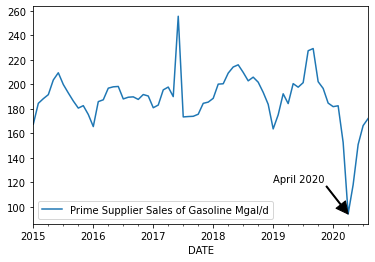

In [10]:
# Rename field to shorter name
gasoline_values = 'District of Columbia Total Gasoline All Sales/Deliveries by Prime Supplier Thousand Gallons per Day'
gasoline_rename = 'Prime Supplier Sales of Gasoline Mgal/d'
gasoline_sales_df = gasoline_sales_df.rename(columns={gasoline_values:gasoline_rename})

# Change format of months in Month column to match our other data
gasoline_sales_df['DATE'] = pd.to_datetime(gasoline_sales_df['Month'], infer_datetime_format=True)

#gasoline_sales_df.head()
gasoline_data_plt = gasoline_sales_df.loc[gasoline_sales_df['DATE']>='01/01/2015']
gasoline_data_fig, gasoline_data_ax = plt.subplots()

gasoline_data_plt.plot(x='DATE', y=gasoline_rename, ax=gasoline_data_ax)

gasoline_data_ax.annotate('April 2020', xy=('4/1/2020', 94), xytext=('1/1/2019', 120), 
                          arrowprops=dict(facecolor='black', width=1))

gasoline_data_ax.figure.savefig('gasoline_data.png')

In [ ]:
# Merge dataframes together
pollution_df = gasoline_sales_df[['DATE', 'Prime Supplier Sales of Gasoline Mgal/d']].merge(CO_monthly_df, on='DATE')
pollution_df = pollution_df.merge(pm10_monthly_df, on='DATE')
pollution_df = pollution_df.merge(NO2_monthly_df, on='DATE')

# Add seasonal dummy variables
# since we observed seasonality in NO2 and CO data, we will add these dummies to try to capture 
# the differing behavior in different months
pollution_df= pollution_df.set_index('DATE')
month_dummies = pd.get_dummies(pollution_df.index.month).rename(columns={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 
                                                                          6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 
                                                                          11:'Nov', 12:'Dec'})
month_dummies.head()

In [ ]:
# Prep data for analysis
pollution_df = pollution_df.reset_index()
pollution_df = pd.concat([pollution_df, month_dummies], axis=1)
pollution_df.head()

In [ ]:
# Create testing and training sets from pollution dataframe based on year
pollution_train_df = pollution_df.loc[pollution_df['DATE'] < '01/01/2019']
pollution_test_df = pollution_df.loc[(pollution_df['DATE'] >= '01/01/2019') & (pollution_df['DATE'] < '01/01/2020')]

In [ ]:
model_CO = CreateOLSModel(pollution_train_df,CO_rename,gasoline_rename)
print(model_CO[0].summary())

In [ ]:
model_pm10 = CreateOLSModel(pollution_train_df,pm10_rename,gasoline_rename)
#print(model_pm10[0].summary())

In [ ]:
model_NO2 = CreateOLSModel(pollution_train_df,NO2_rename,gasoline_rename)
# print(model_NO2[0].summary())

In [ ]:
# Seasonal Test 1

In [ ]:
# Apply seasonal variation to OLS model with gasoline and months.
values = [gasoline_rename, 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

In [ ]:
# Apply seasonal variation to OLS model
model_CO_seasonal = CreateOLSModel(pollution_train_df,CO_rename,values)
# print(model_CO_seasonal[0].summary())

In [ ]:
# Apply seasonal variation to OLS model
model_NO2_seasonal = CreateOLSModel(pollution_train_df,NO2_rename,values)
# print(model_NO2_seasonal[0].summary())

In [ ]:
# Seasonal Test 2

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
model2_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
# print(model2_CO_seasonal[0].summary())

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename,'Feb', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']                                  
model2_NO2_seasonal = CreateOLSModel(pollution_train_df,NO2_rename, values )
# print(model2_NO2_seasonal[0].summary())

In [ ]:
# Seasonal Test 3

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Nov', 'Dec']
model3_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
# print(model3_CO_seasonal[0].summary())

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']                                  
model3_NO2_seasonal = CreateOLSModel(pollution_train_df,NO2_rename, values )
# print(model3_NO2_seasonal[0].summary())

In [ ]:
# Seasonal Test 4

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Nov', 'Dec']
model4_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
# print(model4_CO_seasonal[0].summary())

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Dec']                                  
model4_NO2_seasonal = CreateOLSModel(pollution_train_df,NO2_rename, values )
# print(model4_NO2_seasonal[0].summary())

In [ ]:
# Seasonal Test 5

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Apr', 'May', 'Jul', 'Aug','Sep', 'Nov', 'Dec']
model5_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
# print(model5_CO_seasonal[0].summary())

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename,'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Dec']                                  
model5_NO2_seasonal = CreateOLSModel(pollution_train_df,NO2_rename, values )
# print(model5_NO2_seasonal[0].summary())

In [ ]:
# Seasonal Test 6

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Apr', 'May', 'Jul', 'Aug', 'Nov', 'Dec']
model6_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
# print(model6_CO_seasonal[0].summary())

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values_NO2 = [gasoline_rename,'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct'] 

# Grabs the X and Y to create predictions
model6_NO2_seasonal, X_NO2, Y_NO2 = CreateOLSModel(pollution_train_df,NO2_rename, values_NO2)
# print(model6_NO2_seasonal.summary())

In [ ]:
# Seasonal Test 7

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'May', 'Jul', 'Aug', 'Nov', 'Dec']
model7_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
# print(model7_CO_seasonal[0].summary())

In [ ]:
# Seasonal Test 8

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values8 = [gasoline_rename,'Jul', 'Aug', 'Nov', 'Dec']
model8_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values8)
# print(model8_CO_seasonal[0].summary())

In [ ]:
# Seasonal Test 9

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Jul', 'Nov', 'Dec']
model9_CO_seasonal = CreateOLSModel(pollution_train_df, CO_rename, values)
# print(model9_CO_seasonal[0].summary())

In [ ]:
# Seasonal Test 10

In [ ]:
# Apply seasonal variation with gasoline, excluding least significant month based on p-value
values = [gasoline_rename, 'Nov', 'Dec']

# Grabs the X and Y to create predictions
model10_CO_seasonal, X_CO, Y_CO = CreateOLSModel(pollution_train_df, CO_rename, values)
# print(model10_CO_seasonal.summary())

In [ ]:
# Get predictions for the models that looked the best

# Grab X from model
X_seasonal_CO10 = X_CO
# Create Prediction
predictions_CO_seasonal10 = model10_CO_seasonal.predict(X_seasonal_CO10)

# Grab X from model and model
X_seasonal_NO26 = X_NO2
# Create Prediction
predictions_NO2_seasonal6 = model6_NO2_seasonal.predict(X_seasonal_NO26)

#merge them onto the pollution data frame
pollution_train_df['Predictions_CO_seasonal10'] = predictions_CO_seasonal10
pollution_train_df['Predictions_NO2_seasonal6'] = predictions_NO2_seasonal6
#pollution_train_df

In [ ]:
#plot the actual values vs predicted
CO_predict_train_plt = pollution_train_df.plot(x='DATE', 
                                               y=['Daily Max 8-hour CO Concentration ppm', 'Predictions_CO_seasonal10'])
CO_predict_train_plt
CO_predict_train_plt.figure.savefig('CO_predictions_training_set.png')

In [ ]:
NO2_predict_train_plt = pollution_train_df.plot(x='DATE', 
                                                y=['Daily Max 1-hour NO2 Concentration ppb', 'Predictions_NO2_seasonal6'])
NO2_predict_train_plt
NO2_predict_train_plt.figure.savefig('NO2_predictions_training_set.png')

In [ ]:
#predict 2019 values 
model, X_CO_test, Y_CO_test = CreateOLSModel(pollution_test_df, CO_rename, values)
predictions_CO_2019 = model10_CO_seasonal.predict(X_CO_test)

model, X_NO2_test, Y_NO2_test = CreateOLSModel(pollution_test_df, NO2_rename, values_NO2)
predictions_NO2_2019 = model6_NO2_seasonal.predict(X_NO2_test)

In [ ]:
pollution_test_df['Predictions_CO_2019'] = predictions_CO_2019
pollution_test_df['Predictions_NO2_2019'] = predictions_NO2_2019
#pollution_test_df

In [ ]:
#plot the actual values vs predicted
CO_predict_test_plt = pollution_test_df.plot(x='DATE', y=['Daily Max 8-hour CO Concentration ppm', 'Predictions_CO_2019'])
CO_predict_test_plt
CO_predict_test_plt.figure.savefig('CO_predictions_testing_set.png')

In [ ]:
#plot the actual values vs predicted
NO2_predict_test_plt = pollution_test_df.plot(x='DATE', y=['Daily Max 1-hour NO2 Concentration ppb', 'Predictions_NO2_2019'])
NO2_predict_test_plt
NO2_predict_test_plt.figure.savefig('NO2_predictions_testing_set.png')

In [ ]:
#get MSE for 2019 data vs predictions
CO_seasonal10_MSE1 = ((pollution_test_df['Daily Max 8-hour CO Concentration ppm'] - pollution_test_df['Predictions_CO_2019'])**2).mean()
NO2_seasonal6_MSE1 = ((pollution_test_df['Daily Max 1-hour NO2 Concentration ppb'] - pollution_test_df['Predictions_NO2_2019'])**2).mean()
print('CO_seasonal10_MSE1=', CO_seasonal10_MSE1, ' ', 'NO2_seasonal6_MSE1=', NO2_seasonal6_MSE1)

In [ ]:
#re-estimate models with data through 2019
pollution_df_no2020 = pollution_df.loc[pollution_df['DATE'] < '01/01/2020']

model_CO, X_CO_2019, Y_CO_2019 = CreateOLSModel(pollution_df_no2020, CO_rename, values)
predictions_CO = model_CO.predict(X_CO_2019)

model_NO2, X_NO2_2019, Y_NO2_2019 = CreateOLSModel(pollution_df_no2020, NO2_rename, values_NO2)
predictions_NO2 = model_NO2.predict(X_NO2_2019)

#print(model10_CO_seasonal_2019_data.summary())
#print(model6_NO2_seasonal_2019_data.summary())

#add predictions to df
pollution_df_no2020['Predictions_CO'] = predictions_CO
pollution_df_no2020['Predictions_NO2'] = predictions_NO2
#pollution_df_no2020

In [ ]:
CO_predict_2_plt = pollution_df_no2020.plot(x='DATE', y=['Daily Max 8-hour CO Concentration ppm', 'Predictions_CO'])
CO_predict_2_plt
CO_predict_2_plt.figure.savefig('CO_predictions_final_model_no2020.png')

In [ ]:
NO2_predict_2_plt = pollution_df_no2020.plot(x='DATE', y=['Daily Max 1-hour NO2 Concentration ppb', 'Predictions_NO2'])
NO2_predict_2_plt
NO2_predict_2_plt.figure.savefig('NO2_predictions_final_model_no2020.png')

In [ ]:
#re-calculate MSEs (should be less than first MSE calculation)
CO_seasonal10_MSE2 = ((pollution_df_no2020['Daily Max 8-hour CO Concentration ppm'] - pollution_df_no2020['Predictions_CO'])**2).mean()
NO2_seasonal6_MSE2 = ((pollution_df_no2020['Daily Max 1-hour NO2 Concentration ppb'] - pollution_df_no2020['Predictions_NO2'])**2).mean()
print('CO_seasonal10_MSE2=', CO_seasonal10_MSE2, ' ', 'NO2_seasonal6_MSE2=', NO2_seasonal6_MSE2)

In [ ]:
#now that we have final models, use them to predict 2020 data
X_CO_2020 = pollution_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Nov', 'Dec']]
X_CO_2020 = sm.add_constant(X_CO_2020)
predictions_CO_2020 = model_CO.predict(X_CO_2020)

X_NO2_2020 = pollution_df[['Prime Supplier Sales of Gasoline Mgal/d', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']]
X_NO2_2020 = sm.add_constant(X_NO2_2020)
predictions_NO2_2020 = model_NO2.predict(X_NO2_2020)

#add predictions to df
pollution_df['Predictions_CO'] = predictions_CO_2020
pollution_df['Predictions_NO2'] = predictions_NO2_2020

In [ ]:
CO_predict_final_plt = pollution_df.plot(x='DATE', y=['Daily Max 8-hour CO Concentration ppm', 'Predictions_CO'])
CO_predict_final_plt
CO_predict_final_plt.figure.savefig('CO_predictions_final_all_data.png')

In [ ]:
NO2_predict_final_plt = pollution_df.plot(x='DATE', y=['Daily Max 1-hour NO2 Concentration ppb', 'Predictions_NO2'])
NO2_predict_final_plt
NO2_predict_final_plt.figure.savefig('NO2_predictions_final_all_data.png')

In [ ]:
model_CO.summary()

In [ ]:
model_NO2.summary()

In [ ]:
pollution_df.to_excel('data_and_predictions.xlsx', index=False)

In [ ]:
pollution_df.plot(x='DATE', y='Daily Max 1-hour NO2 Concentration ppb')